In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

In a dataset we have X & y variables
*   X variables are independent variables known as Features
*   y variable is dependent variable known as label or target variable


Types of Regression
1. **Linear Regression**:
   Linear relationship between one independent & one dependent variable.

2. **Multiple Regression**:
   Linear relationship between two or more independent variables & one dependent variable.

3. **Polynomial Regression**:
   Relationship between one independent & one dependent variable using an nth degree polynomial function.

4. **Polynomial Multiple Regression**:
   Relationship between two or more independent variables & one dependent variable using an nth degree polynomial function.

5. **Multivariate Linear Regression**:
   Used when there is more than one correlated dependent variable.




# Linear Regression

In [2]:
dataset = load_boston()
#print(dataset.feature_names)
#print(dataset.DESCR)
#print(dataset.target)

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Add a target variable to dataset
df['MEDV'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Feature Selection

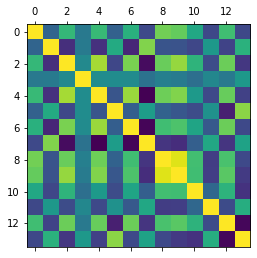

In [5]:
corr = df.corr()
plt.matshow(corr)
#cb = plt.colorbar()
plt.show()

In [6]:
corr.style.background_gradient() #cmap='coolwarm'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
# To get top 3 features with highest correlation value
print(df.corr().abs().nlargest(3, 'MEDV').index)

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')


In [8]:
# To get top 3 correlation values
print(df.corr().abs().nlargest(3, 'MEDV').values[:, 13])

[1.         0.73766273 0.69535995]


# Multiple Regression

Text(0, 0.5, 'MEDV')

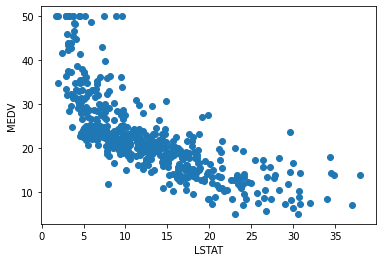

In [9]:
plt.scatter(df['LSTAT'], df['MEDV'], marker = 'o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

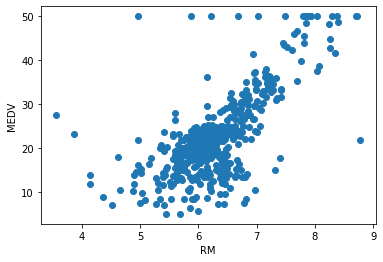

In [10]:
plt.scatter(df['RM'], df['MEDV'], marker = 'o')
plt.xlabel('RM')
plt.ylabel('MEDV')

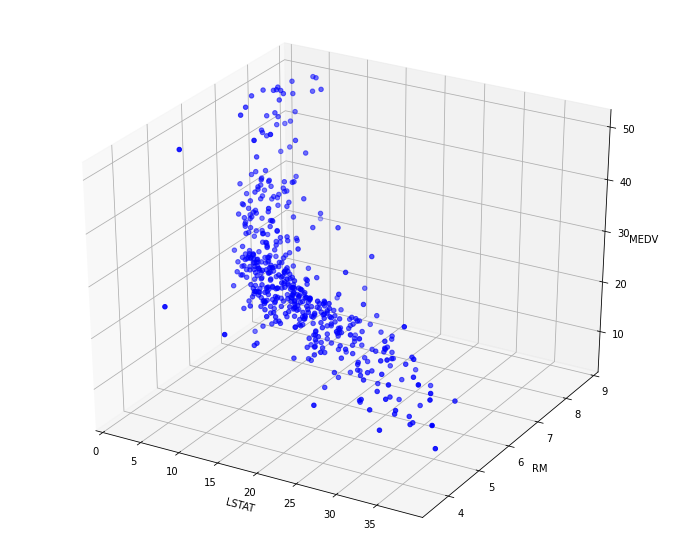

In [11]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['LSTAT'], df['RM'], df['MEDV'], c = 'b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

## Training the model

X-train:  (354, 2)
Y-train:  (354,)
X-test:  (152, 2)
Y-test:  (152,)
R-squared: 0.6162
Mean Squared Error: 36.4942


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

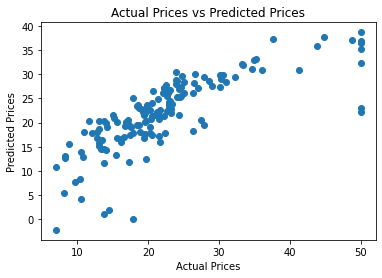

In [12]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

print("X-train: ", x_train.shape)
print("Y-train: ", y_train.shape)
print("X-test: ", x_test.shape)
print("Y-test: ", y_test.shape)

model = LinearRegression()
model.fit(x_train, y_train)
price_pred = model.predict(x_test)

print('R-squared: %.4f' % model.score(x_test, y_test))

mse = mean_squared_error(y_test, price_pred)
print('Mean Squared Error: %.4f' % mse)

plt.scatter(y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

## Getting intercepts & coefficients

In [13]:
model.intercept_

0.38437936780346504

In [14]:
model.coef_

array([-0.65957972,  4.83197581])

## Plotting the 3D Plane

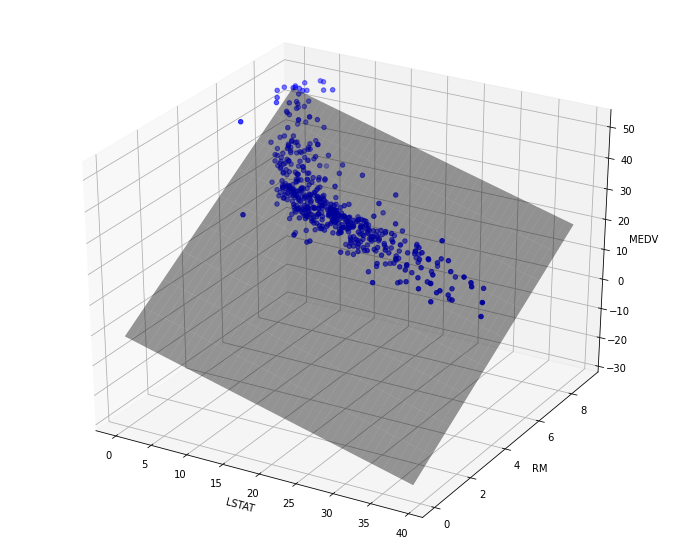

In [15]:
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
y = df['MEDV']

fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['LSTAT'], df['RM'], df['MEDV'], c = 'b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

# Crete meshgrid of all values for LSTAT and RM
x_surf = np.arange(0, 40, 1)    # for LSTAT
y_surf = np.arange(0, 10, 1)    # for RM
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

model = LinearRegression()
model.fit(x, y)

z = lambda x, y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)

ax.plot_surface(x_surf, y_surf, z(x_surf, y_surf), rstride=1, cstride=1, color='None', alpha=0.4)

plt.show()

# Polynomial Regression

In [16]:
poly_df = pd.DataFrame(data = {'x': [1.5, 2, 3, 4, 5, 6], 'y': [1.5, 2.5, 4, 4, 4.5, 5]})
poly_df

,x,y
0,1.5,1.5
1,2.0,2.5
2,3.0,4.0
3,4.0,4.0
4,5.0,4.5
5,6.0,5.0


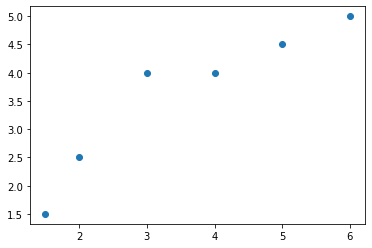

In [17]:
plt.scatter(poly_df.x, poly_df.y)

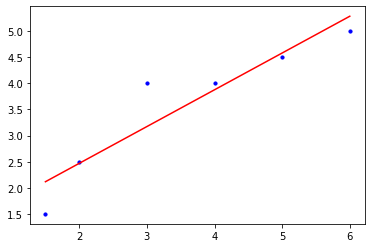

R-squared for training set: 0.8658


In [18]:
model = LinearRegression()

x = np.array(poly_df.x)
y = np.array(poly_df.y)

#x = poly_df.x[0:6, np.newaxis]
#y = poly_df.y[0:6, np.newaxis]

x = x[0:6, np.newaxis]
y = y[0:6, np.newaxis]

model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x, y, s=10, color='b')
plt.plot(x, y_pred, color='r')
plt.show()
print('R-squared for training set: %.4f' % model.score(x, y))

In [19]:
degree = 4
polynomial_features = PolynomialFeatures(degree = degree)
x_poly = polynomial_features.fit_transform(x)
print(polynomial_features.get_feature_names('x'))

['1', 'x', 'x^2', 'x^3', 'x^4']


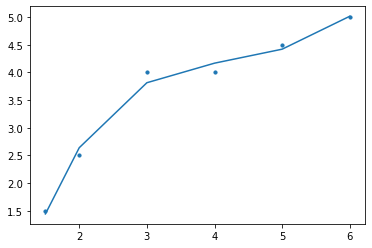

[-6.4426212]
[[ 0.          8.13055582 -2.31251165  0.28201638 -0.01156661]]
R-Squared for training set: 0.9894


In [20]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)

plt.plot(x, y_poly_pred)
plt.show()

print(model.intercept_)
print(model.coef_)

print('R-Squared for training set: %.4f' % model.score(x_poly, y))

## Bias & Variance

**Bias**:
The inability of a machine learning algorithm to capture true relationship between the variables and the outcome.
*   High Bias: Line doesn't cut through all the points (Underfitting)
*   Low Bias: Curvy line that fits all the points (Overfitting)

**Variance**:
The fit between the datasets.
*   High Variance: It will result in vastly different RSS for different datasets. You cannot predict how well it will perform on other datasets
*   Low Variance: It will give consistent predictions.

**Ideal situation**:
High bias, with line cutting as many points as possible
Low variance, with the line resulting in consistent predictions on different datasets

## Techniques for finding Balance
To find balance between simple model and complex model, following techniques can be used:
1. **Regularization**: 
Technique that automatically penalizes the extra features used in modeling.

2. **Bagging** (Bootstrap Aggregation): 
Bagging uses a subset of the data and each sample trains a weaker learner. The weak learners are then combined to create a strong learner that can make accurate predictions.

3. **Boosting**: 
It uses all the data to train each learner, but data points that were misclassified by previous learners are given more weight so that the subsequent learners will give more focus to them during training.





# Polynomial Multiple Regression

In [21]:
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

degree = 2
polynomial_features = PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train)
print(polynomial_features.get_feature_names(['x', 'y']))

model = LinearRegression()
model.fit(x_train_poly, y_train)
x_test_poly = polynomial_features.fit_transform(x_test)
print('R-squared: %.4f' % model.score(x_test_poly, y_test))
print(model.intercept_)
print(model.coef_)

['1', 'x', 'y', 'x^2', 'x y', 'y^2']
R-squared: 0.7340
26.933430523839284
[ 0.00000000e+00  1.47424550e+00 -6.70204730e+00  7.93570743e-04
 -3.66578385e-01  1.17188007e+00]


['1', 'x', 'y', 'x^2', 'x y', 'y^2']


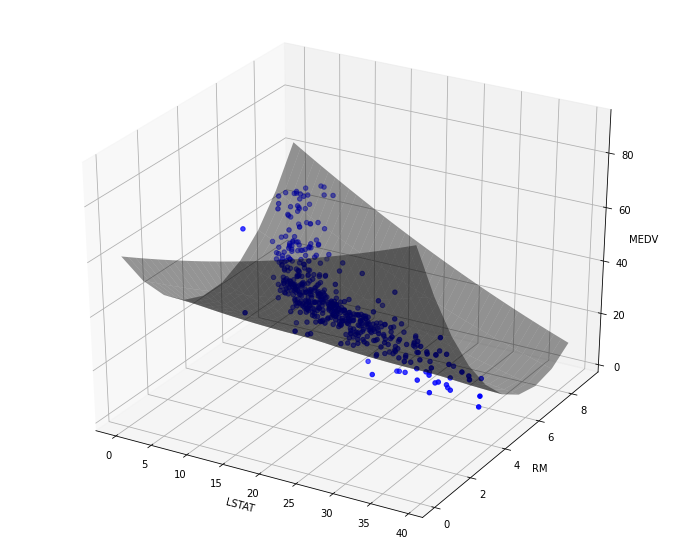

In [22]:
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
y = df['MEDV']

fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['LSTAT'], x['RM'], y, c = 'b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

# Crete meshgrid of all values for LSTAT and RM
x_surf = np.arange(0, 40, 1)    # for LSTAT
y_surf = np.arange(0, 10, 1)    # for RM
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

degree = 2
polynomial_features = PolynomialFeatures(degree = degree)
x_poly = polynomial_features.fit_transform(x)
print(polynomial_features.get_feature_names(['x', 'y']))

model = LinearRegression()
model.fit(x_poly, y)

z = lambda x, y: (model.intercept_ + 
                  (model.coef_[1] * x) + 
                  (model.coef_[2] * y) +
                  (model.coef_[3] * x**2) +
                  (model.coef_[4] * x*y) +
                  (model.coef_[5] * y**2))

ax.plot_surface(x_surf, y_surf, z(x_surf, y_surf), rstride=1, cstride=1, color='None', alpha=0.4)
plt.show()